Image dimensions: 360 x 540


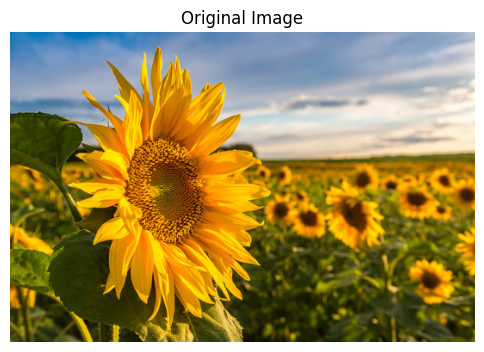

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load the image
ImJPG = cv2.imread('rgb.png')

# Convert to RGB (OpenCV loads images in BGR format)
ImJPG = cv2.cvtColor(ImJPG, cv2.COLOR_BGR2RGB)

# Get dimensions
m, n, _ = ImJPG.shape

# Display image dimensions
print(f"Image dimensions: {m} x {n}")

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG)
plt.axis('off')
plt.title('Original Image')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-24.99883382301369..279.9956944308919].


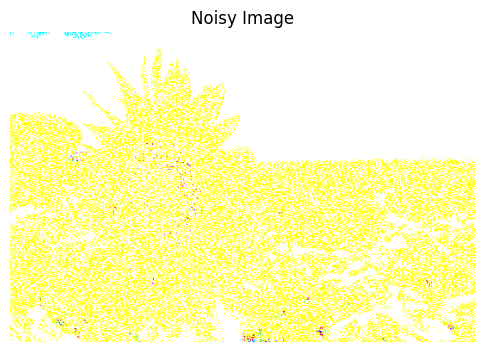

In [46]:
noise = 50 * (np.random.rand(m, n, 3) - 0.5)
# Add noise to each channel of the image
ImJPG_Noisy = np.double(ImJPG) + noise
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG_Noisy)
plt.axis('off')
plt.title('Noisy Image')
plt.show()

In [47]:
Kernel_Average1 = np.array([[0, 1, 0],
[1, 1, 1],
[0, 1, 0]]) / 5
Kernel_Average2 = np.array([[1, 1, 1],
[1, 1, 1],
[1, 1, 1]]) / 9

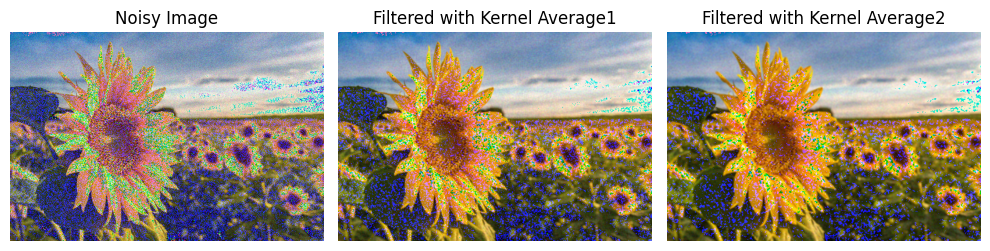

In [55]:
ImJPG_Average1 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)
ImJPG_Average2 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

for c in range(ImJPG_Noisy.shape[2]):
    ImJPG_Average1[:, :, c] = convolve2d(ImJPG_Noisy[:, :, c], Kernel_Average1, mode='same', boundary='symm')
    ImJPG_Average2[:, :, c] = convolve2d(ImJPG_Noisy[:, :, c], Kernel_Average2, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Average1 = np.uint8(ImJPG_Average1)
ImJPG_Average2 = np.uint8(ImJPG_Average2)
# Display the resulting images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.uint8(ImJPG_Noisy))
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Average1)
plt.title('Filtered with Kernel Average1')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Average2)
plt.title('Filtered with Kernel Average2')
plt.axis('off')
plt.tight_layout()
plt.show()

In [56]:
Kernel_Gauss = np.array([[0, 1, 0],

[1, 4, 1],
[0, 1, 0]]) / 8

print("Kernel Gauss:")
print(Kernel_Gauss)

Kernel Gauss:
[[0.    0.125 0.   ]
 [0.125 0.5   0.125]
 [0.    0.125 0.   ]]


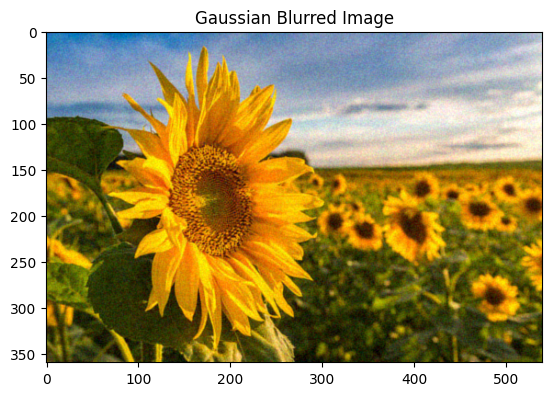

In [57]:
ImJPG_Gauss = np.zeros_like(ImJPG_Noisy, dtype=np.float64)
#Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Gauss[:, :, channel] = convolve2d(ImJPG_Noisy[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')
# Convert the results back to uint8 format for display
ImJPG_Gauss = np.uint8(np.clip(ImJPG_Gauss, 0, 255))
# Display the resulting image
plt.figure()
plt.imshow(ImJPG_Gauss)
plt.title('Gaussian Blurred Image')
plt.show()

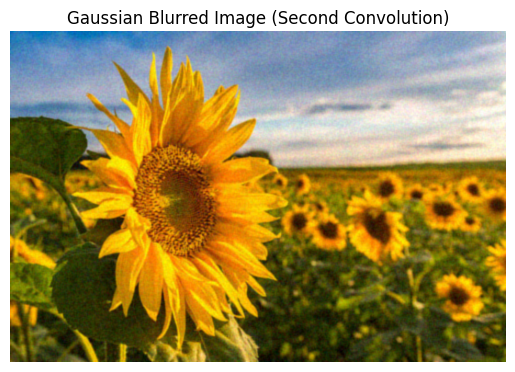

In [58]:
ImJPG_Gauss2 = np.zeros_like(ImJPG_Gauss, dtype=np.float64)
for channel in range(3):
    ImJPG_Gauss2[:, :, channel] = convolve2d(ImJPG_Gauss[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')
ImJPG_Gauss2 = np.uint8(np.clip(ImJPG_Gauss2, 0, 255))
plt.figure()
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blurred Image (Second Convolution)')
plt.axis('off')
plt.show()

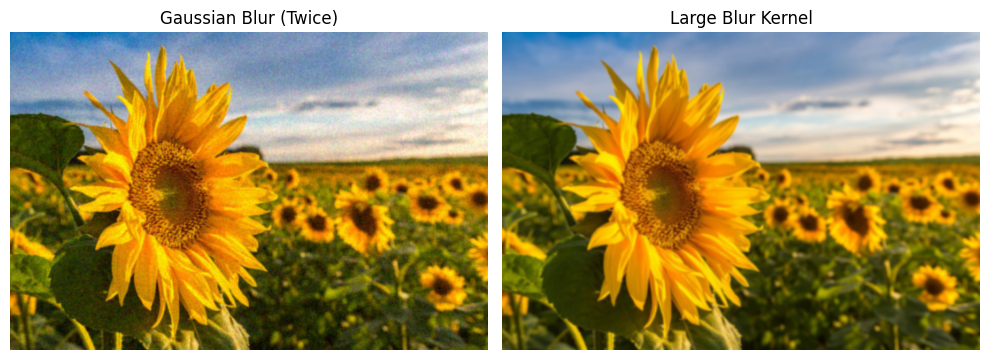

In [59]:
Kernel_Large = np.array([[0, 1, 2, 1, 0],

[1, 4, 8, 4, 1],
[2, 8, 16, 8, 2],
[1, 4, 8, 4, 1],
[0, 1, 2, 1, 0]]) / 80

# Apply the larger blur kernel to the image
ImJPG_Large = np.zeros_like(ImJPG, dtype=np.float64)
for channel in range(3):
    ImJPG_Large[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Large, mode='same',boundary='symm')
ImJPG_Large = np.uint8(np.clip(ImJPG_Large, 0, 255))
# Display the resulting images
plt.figure(figsize=(10, 5))
# Display Gaussian blurred image (second convolution)
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blur (Twice)')
plt.axis('off')
# Display larger blur image
plt.subplot(1, 2, 2)
plt.imshow(ImJPG_Large)
plt.title('Large Blur Kernel')
plt.axis('off')
plt.tight_layout()
plt.show()

In [60]:
Kernel_Sharp1 = np.array([[0, -1, 0],

[-1, 5, -1],
[0, -1, 0]])

Kernel_Sharp2 = np.array([[-1, -1, -1],

[-1, 9, -1],
[-1, -1, -1]])

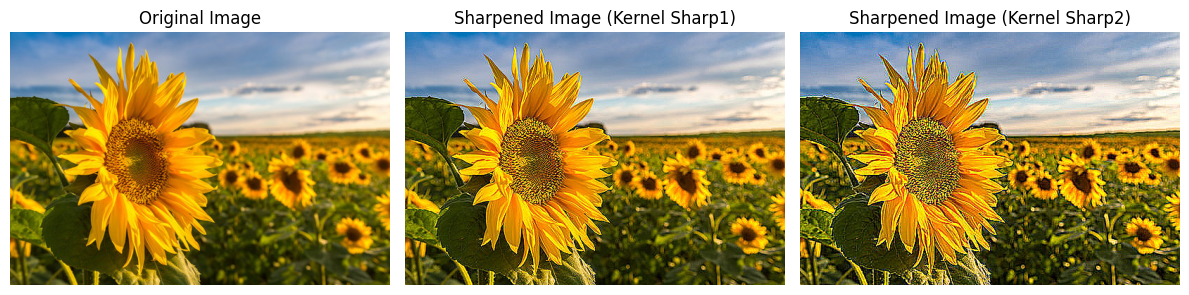

In [62]:
ImJPG_Sharp1 = np.zeros_like(ImJPG, dtype=np.float64)
ImJPG_Sharp2 = np.zeros_like(ImJPG, dtype=np.float64)

for channel in range(ImJPG.shape[2]):  # Loop through R, G, B channels
    ImJPG_Sharp1[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Sharp1, mode='same', boundary='symm')
    ImJPG_Sharp2[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Sharp2, mode='same', boundary='symm')

ImJPG_Sharp1 = np.clip(ImJPG_Sharp1, 0, 255).astype(np.uint8)
ImJPG_Sharp2 = np.clip(ImJPG_Sharp2, 0, 255).astype(np.uint8)

# Convert the results back to uint8 format for display
ImJPG_Sharp1 = np.clip(ImJPG_Sharp1, 0, 255).astype(np.uint8)
ImJPG_Sharp2 = np.clip(ImJPG_Sharp2, 0, 255).astype(np.uint8)
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sharp1, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp1)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sharp2, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp2)')
plt.axis('off')
plt.tight_layout()
plt.show()

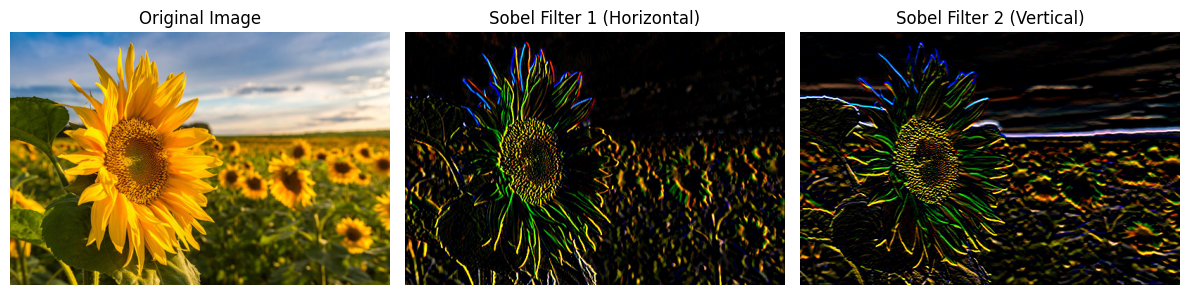

In [64]:
Kernel_Sobel1 = np.array([[-1, 0, 1],

[-2, 0, 2],
[-1, 0, 1]])

Kernel_Sobel2 = np.array([[-1, -2, -1],

[0, 0, 0],
[1, 2, 1]])
ImJPG_Sobel1 = np.zeros_like(ImJPG, dtype=np.float64)
ImJPG_Sobel2 = np.zeros_like(ImJPG, dtype=np.float64)
for channel in range(ImJPG.shape[2]):  # Loop through R, G, B channels
    ImJPG_Sobel1[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Sobel1, mode='same', boundary='symm')
    ImJPG_Sobel2[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Sobel2, mode='same', boundary='symm')
# Clip and convert the results back to uint8 for display
ImJPG_Sobel1 = np.uint8(np.clip(ImJPG_Sobel1, 0, 255))
ImJPG_Sobel2 = np.uint8(np.clip(ImJPG_Sobel2, 0, 255))
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sobel1, cmap='gray')
plt.title('Sobel Filter 1 (Horizontal)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sobel2, cmap='gray')
plt.title('Sobel Filter 2 (Vertical)')
plt.axis('off')
plt.tight_layout()
plt.show()

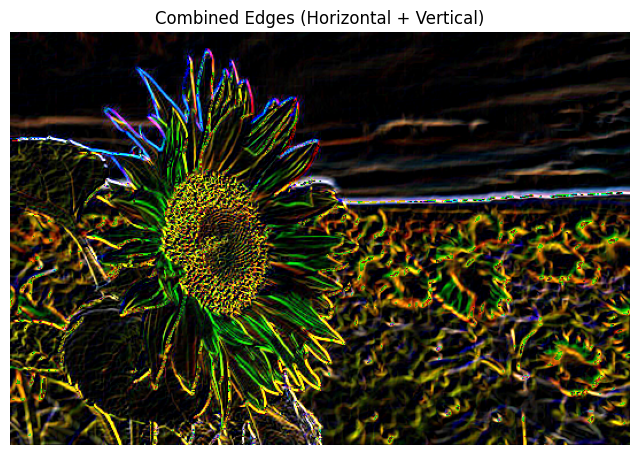

In [66]:

ImJPG_SobelCombined = ImJPG_Sobel1 + ImJPG_Sobel2

# Clip and convert the combined result back to uint8 for display
ImJPG_SobelCombined = np.uint8(np.clip(ImJPG_SobelCombined, 0, 255))

# Display the combined edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_SobelCombined, cmap='gray')
plt.title('Combined Edges (Horizontal + Vertical)')
plt.axis('off')
plt.show()

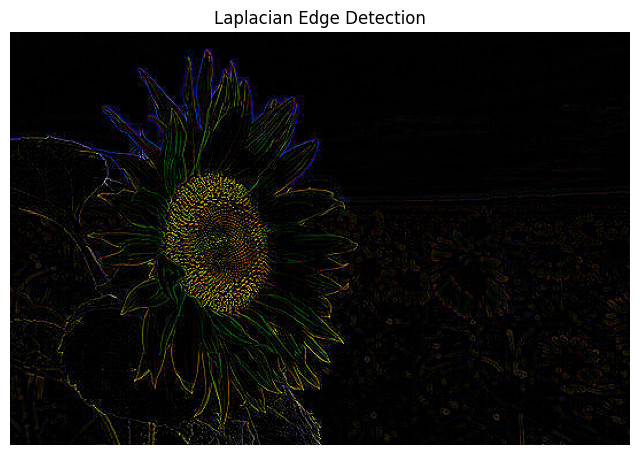

In [67]:
Kernel_Laplace = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])

ImJPG_Laplace = np.zeros_like(ImJPG, dtype=np.float64)

# Loop through all channels (RGB)
for channel in range(ImJPG.shape[2]):  
    ImJPG_Laplace[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Laplace, mode='same', boundary='symm')

# Clip and convert the result back to uint8 for display
ImJPG_Laplace = np.clip(ImJPG_Laplace, 0, 255).astype(np.uint8)

# Display the Laplacian edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_Laplace)
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()